<a href="https://colab.research.google.com/github/abhinav153/Football-Player-Tracking/blob/main/football_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/metrica-sports/sample-data.git


Cloning into 'sample-data'...
remote: Enumerating objects: 63, done.
remote: Counting objects: 100% (63/63), done.
remote: Compressing objects: 100% (60/60), done.
remote: Total 63 (delta 13), reused 29 (delta 2), pack-reused 0
Unpacking objects: 100% (63/63), done.


In [2]:
!pip install mplsoccer

     |████████████████████████████████| 61kB 5.6MB/s 
  Created wheel for mplsoccer: filename=mplsoccer-1.0.5-cp37-none-any.whl size=62948 sha256=fd53d3c18a540479f1c852657282a532dbbad9c227cc1cb664486e9896bae8a4
  Stored in directory: /root/.cache/pip/wheels/1e/89/34/a6679a2c0b05f035f97ccc671f73139d2859b7612995416d2a
Successfully built mplsoccer


In [32]:
import glob
import pandas as pd
from mplsoccer import Pitch
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.patches as mpatches

In [4]:
#intialize paths to data
data = 'sample-data/data/*'

In [5]:
games = glob.glob(data)

In [6]:
game1 = glob.glob(games[0]+'/*')
game2 = glob.glob(games[1]+'/*')
game3 = glob.glob(games[2]+'/*')

In [7]:
game1

['sample-data/data/Sample_Game_1/Sample_Game_1_RawEventsData.csv',
 'sample-data/data/Sample_Game_1/Sample_Game_1_RawTrackingData_Home_Team.csv',
 'sample-data/data/Sample_Game_1/Sample_Game_1_RawTrackingData_Away_Team.csv']

In [8]:
raw_events_data_g1 =  pd.read_csv(game1[0])

In [9]:
raw_events_data_g1.head()

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
0,Away,SET PIECE,KICK OFF,1,1,0.04,0,0.00,Player19,NaN,NaN,NaN,NaN,NaN
1,Away,PASS,NaN,1,1,0.04,3,0.12,Player19,Player21,0.45,0.39,0.55,0.43
2,Away,PASS,NaN,1,3,0.12,17,0.68,Player21,Player15,0.55,0.43,0.58,0.21
3,Away,PASS,NaN,1,45,1.80,61,2.44,Player15,Player19,0.55,0.19,0.45,0.31
4,Away,PASS,NaN,1,77,3.08,96,3.84,Player19,Player21,0.45,0.32,0.49,0.47


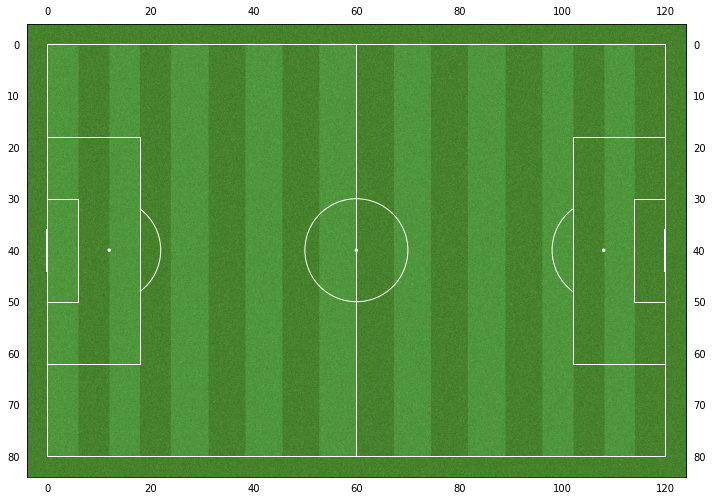

In [10]:
#lets draw a football pitch first
pitch = Pitch(pitch_color='grass', line_color='white', stripe=True,linewidth = 1,axis=True,label=True)
fig, ax = pitch.draw(figsize=(10,10))

#in terms of pixels grid is 120x80

Since the the original co-ordinate system was made using, considering the left bottom corner as the origin and on the scale of 0-1, we need to transform the co-ordinate system of the orginal data to fit ours 

In [11]:
def transform_co_ordinate_system(data):
  data.loc[1:,['Start X']] = data.loc[1:,['Start X']].apply(lambda x : x*120)
  data.loc[1:,['End X']] = data.loc[1:,['End X']].apply(lambda x : x*120)
  data.loc[1:,['Start Y']] = data.loc[1:,['Start Y']].apply(lambda y : (1-y)*80)
  data.loc[1:,['End Y']] = data.loc[1:,['End Y']].apply(lambda y : (1-y)*80)
 
  return data.head()

In [12]:
#transforming co-ordinates(to be performed only once)
transform_co_ordinate_system(raw_events_data_g1)

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
0,Away,SET PIECE,KICK OFF,1,1,0.04,0,0.00,Player19,NaN,NaN,NaN,NaN,NaN
1,Away,PASS,NaN,1,1,0.04,3,0.12,Player19,Player21,54.0,48.8,66.0,45.6
2,Away,PASS,NaN,1,3,0.12,17,0.68,Player21,Player15,66.0,45.6,69.6,63.2
3,Away,PASS,NaN,1,45,1.80,61,2.44,Player15,Player19,66.0,64.8,54.0,55.2
4,Away,PASS,NaN,1,77,3.08,96,3.84,Player19,Player21,54.0,54.4,58.8,42.4


In [13]:
df = raw_events_data_g1

In [14]:
#now lets do some EDA
home = df[df['Team'] == 'Home']
away = df[df['Team'] == 'Away']

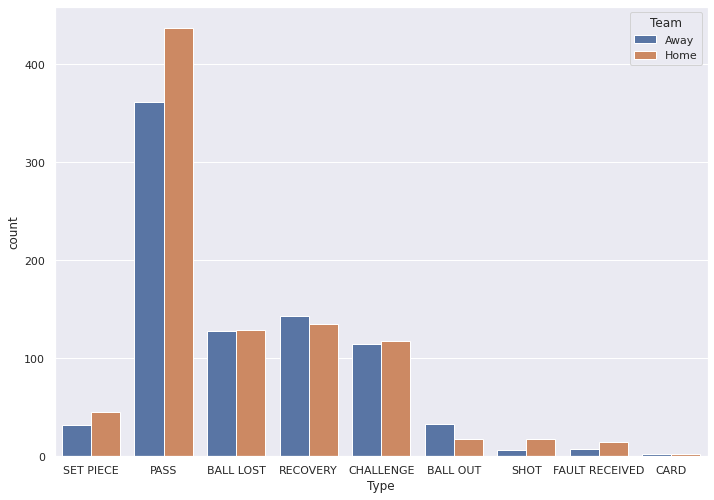

In [15]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x='Type',hue = 'Team',data=df)


Home teams seems to favour possession more,as seen by their pass metric<br>
Lets see the pass map of the Home team , to see where in the pitch  they had possesion more

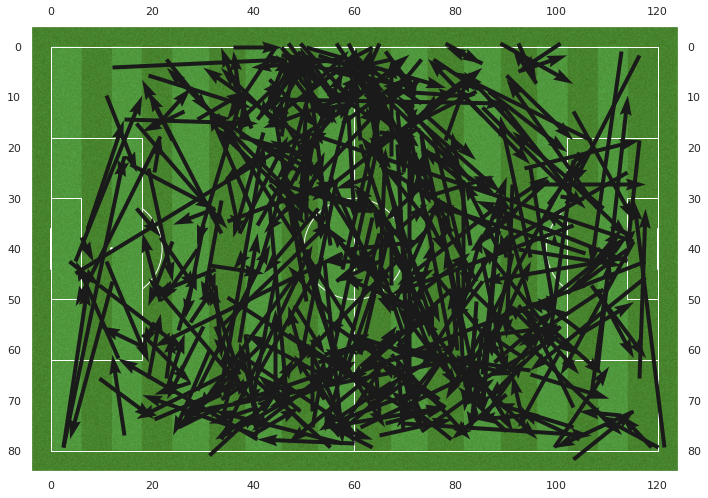

In [16]:
home_passes = home[home['Type'] == 'PASS'][['Start X','Start Y','End X','End Y']]
pass_map = Pitch(pitch_color='grass', line_color='white', stripe=True,linewidth = 1,axis=True,label=True)
fig1, ax1 = pass_map.draw(figsize=(10,10))
for i in range(len(home_passes)):
  pass_map.arrows(home_passes.iloc[i,0],home_passes.iloc[i,1],home_passes.iloc[i,2],home_passes.iloc[i,3],ax=ax1)

Seems like home time likes to have posession in wider areas<br>
Next lets analyze , where the shots occured for both teams

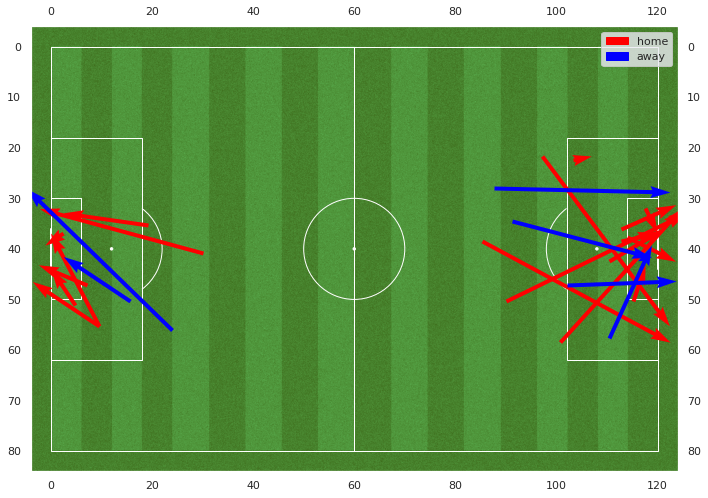

In [33]:
home_shots = home[home['Type'] == 'SHOT'][['Start X','Start Y','End X','End Y']]
away_shots = away[away['Type'] == 'SHOT'][['Start X','Start Y','End X','End Y']]
shots_map = Pitch(pitch_color='grass', line_color='white', stripe=True,linewidth = 1,axis=True,label=True)
fig2, ax2 = shots_map.draw(figsize=(10,10))
for i in range(len(home_shots)):
  shots_map.arrows(home_shots.iloc[i,0],home_shots.iloc[i,1],home_shots.iloc[i,2],home_shots.iloc[i,3],ax=ax2,color='red',)
for i in range(len(away_shots)):
  shots_map.arrows(away_shots.iloc[i,0],away_shots.iloc[i,1],away_shots.iloc[i,2],away_shots.iloc[i,3],ax=ax2,color='blue',)

red_patch  = mpatches.Patch(color='red',label='home')
blue_patch = mpatches.Patch(color='blue',label='away')
ax2.legend(handles=[red_patch,blue_patch])

From the data it is clear that,the home team had better quality shots, while the away team was restricted to shots further away from the goal

In [35]:
df[df['Type'] == 'PASS']

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
1,Away,PASS,NaN,1,1,0.04,3,0.12,Player19,Player21,54.0,48.8,66.0,45.6
2,Away,PASS,NaN,1,3,0.12,17,0.68,Player21,Player15,66.0,45.6,69.6,63.2
3,Away,PASS,NaN,1,45,1.80,61,2.44,Player15,Player19,66.0,64.8,54.0,55.2
4,Away,PASS,NaN,1,77,3.08,96,3.84,Player19,Player21,54.0,54.4,58.8,42.4
5,Away,PASS,NaN,1,191,7.64,217,8.68,Player21,Player22,48.0,21.6,38.4,1.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1731,Away,PASS,NaN,2,142715,5708.60,142755,5710.20,Player20,Player27,49.2,53.6,72.0,76.8
1736,Away,PASS,NaN,2,143130,5725.20,143137,5725.48,Player16,Player18,60.0,50.4,73.2,37.6
1739,Home,PASS,NaN,2,143262,5730.48,143297,5731.88,Player14,Player12,90.0,62.4,85.2,57.6
1740,Home,PASS,NaN,2,143361,5734.44,143483,5739.32,Player12,Player13,72.0,53.6,22.8,4.0
